In [3]:
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense , Dropout ,Flatten


import numpy as np



In [7]:
from keras.layers import MaxPool2D , Conv2D

In [11]:
(X_train,y_train) , (X_test,y_test) = mnist.load_data()
X_train.shape
X_test.shape

(10000, 28, 28)

In [13]:
num_classes =10

In [14]:



X_train=X_train.reshape(60000, 28, 28,1)
X_test=X_test.reshape(10000, 28, 28,1)


5
5


In [15]:


print(y_train[0])
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


model = Sequential(): You create a sequential model, which is a linear stack of layers. This means that you'll add layers to the model one after the other.

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)): Here, you add the first convolutional layer to the model. This layer has 32 filters (also called kernels), each of size 3x3. The 'relu' activation function is used. The input_shape parameter indicates that the input images are 28x28 pixels with a single color channel (grayscale).

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')): This adds a second convolutional layer with 64 filters and a 3x3 kernel size. Again, the 'relu' activation function is used.

model.add(MaxPool2D(pool_size=(2, 2))): After each convolutional layer, you add a max-pooling layer. Max-pooling reduces the spatial dimensions of the feature maps, helping the model focus on the most important information. Here, you're using a 2x2 max-pooling window.

model.add(Dropout(0.25)): Dropout is a regularization technique used to prevent overfitting. It randomly sets a fraction (in this case, 25%) of the input units to zero during training, which helps the model generalize better.

model.add(Flatten()): This layer flattens the output from the previous layers into a one-dimensional vector. It prepares the data for the fully connected (dense) layers that follow.

model.add(Dense(128, activation='relu')): You add a fully connected layer with 128 neurons and a 'relu' activation function. This layer learns complex patterns in the data.

model.add(Dense(39, activation='relu')): There is a dense layer with 39 neurons and 'relu' activation. It's important to note that 39 neurons is an unusual choice, especially for a classification task. Typically, the number of neurons in the last dense layer should match the number of classes, which you previously set as num_classes = 10.

model.add(Dense(num_classes, activation='softmax')): Finally, you add the output layer with num_classes (which is 10 for classifying digits) neurons and a 'softmax' activation function. Softmax converts the network's raw output into class probabilities.

model.summary(): This line prints a summary of the model architecture, including the number of parameters in each layer and the total number of trainable parameters in the model.

In [19]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape =  (28,28,1)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(39,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               1179776   
                                                      

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history = model.fit(X_train,y_train,batch_size=40,epochs=10,validation_data=(X_test,y_test),verbose = 1)


score= model.evaluate(X_test,y_test)

Epoch 1/10
1500/1500 [==============================] - 93s 61ms/step - loss: 7.9853 - accuracy: 0.2444 - val_loss: 1.5949 - val_accuracy: 0.5388
Epoch 2/10
1500/1500 [==============================] - 107s 71ms/step - loss: 2.2381 - accuracy: 0.4780 - val_loss: 0.9766 - val_accuracy: 0.6980
Epoch 3/10
1500/1500 [==============================] - 102s 68ms/step - loss: 1.5494 - accuracy: 0.5949 - val_loss: 0.7373 - val_accuracy: 0.7698
Epoch 4/10
1500/1500 [==============================] - 93s 62ms/step - loss: 1.2097 - accuracy: 0.6699 - val_loss: 0.6058 - val_accuracy: 0.8170
Epoch 5/10
1500/1500 [==============================] - 89s 59ms/step - loss: 1.0144 - accuracy: 0.7189 - val_loss: 0.5269 - val_accuracy: 0.8412
Epoch 6/10
1500/1500 [==============================] - 91s 60ms/step - loss: 0.8821 - accuracy: 0.7505 - val_loss: 0.4683 - val_accuracy: 0.8654
Epoch 7/10
1500/1500 [==============================] - 91s 61ms/step - loss: 0.7890 - accuracy: 0.7781 - val_loss: 0.4256

NameError: name 'score' is not defined

Accuracy Graph:

What it shows: This graph has two lines - one for training accuracy and one for validation accuracy. It tells you how well your CNN is at correctly classifying images.
What to look for: You want both lines to go up and stay close to each other. If the training accuracy is much higher than the validation accuracy, it might indicate overfitting (the model memorizes the training data but doesn't generalize well to new data).




Loss (Error) Graph:

What it shows: Similar to the accuracy graph, this graph also has two lines - one for training loss and one for validation loss. It measures how well your CNN's predictions match the actual labels.
What to look for: You want both lines to go down and stay close to each other. If the training loss keeps decreasing while the validation loss starts increasing, it's a sign of overfitting.
In simple terms, these graphs help you see how your CNN is doing during training:

Accuracy graphs show how often it's getting the right answers.
Loss graphs show how far off its predictions are.
You want both accuracy to be high and loss to be low, and you want these good results to apply to both the training data and data the model hasn't seen before (validation data). If the lines on these graphs behave as expected, it's a sign that your model is learning well. If they don't, it might need some adjustments or more training.







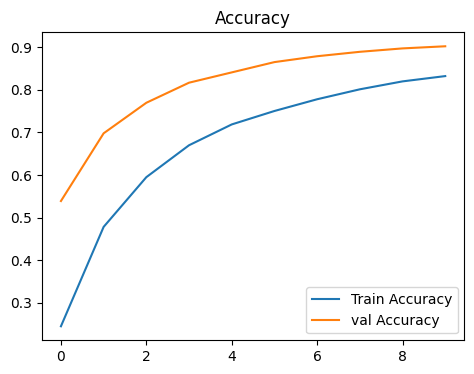

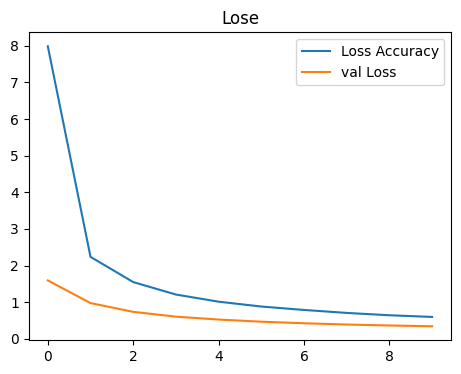

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))


plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Loss Accuracy')
plt.plot(history.history['val_loss'],label='val Loss')
plt.legend()
plt.title('Lose')


plt.show()